In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Showing table names.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
#show column names
columns = inspector.get_columns('measurement')
for n in columns:
    print(n['name'], n['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#show column names
columns = inspector.get_columns('station')
for n in columns:
    print(n['name'], n['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#showing date in desc in order to determine checkpoint for last 12 months.
engine.execute("select * from measurement order by date desc limit 5").fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0)]

In [14]:
engine.execute("select * from station limit 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
last_12m = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-8-23')
last_12m

In [16]:
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_day
last_day = pd.to_datetime(last_day).date

In [17]:
# Calculate the date 1 year ago from the last data point in the database
last_year = last_day - dt.timedelta(days=365)
last_year

array([datetime.date(2016, 8, 23)], dtype=object)

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df_last_12 = pd.read_sql_query(last_12m.statement, engine, index_col='date')
df_last_12.head()

,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


In [19]:
type(df_last_12)

pandas.core.frame.DataFrame

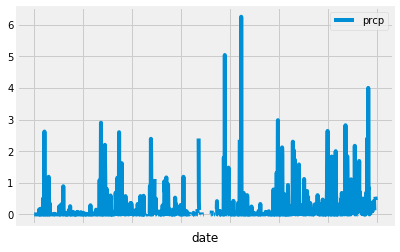

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
df_last_12.plot()
plt.show()

![precipitation](Images/precipitation.png)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_last_12.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
station_num = session.query(Station.station).count()

In [23]:
station_num

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

In [25]:
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
most_active = active_stations[0]
most_active

('USC00519281', 2772)

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station_temp = session.query(Measurement.station,\
                            Measurement.tobs).filter(Measurement.station == most_active.station,\
                                                     Measurement.date > '2016-8-23').all()

In [28]:
most_active_station_temp

[('USC00519281', 72.0),
 ('USC00519281', 70.0),
 ('USC00519281', 64.0),
 ('USC00519281', 63.0),
 ('USC00519281', 63.0),
 ('USC00519281', 62.0),
 ('USC00519281', 70.0),
 ('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 62.0),
 ('USC00519281', 63.0),
 ('USC00519281', 65.0),
 ('USC00519281', 69.0),
 ('USC00519281', 77.0),
 ('USC00519281', 70.0),
 ('USC00519281', 74.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 71.0),
 ('USC00519281', 69.0),
 ('USC00519281', 71.0),
 ('USC00519281', 71.0),
 ('USC00519281', 72.0),
 ('USC00519281', 72.0),
 ('USC00519281', 69.0),
 ('USC00519281', 70.0),
 ('USC00519281', 66.0),
 ('USC00519281', 65.0),
 ('USC00519281', 69.0),
 ('USC00519281', 68.0),
 ('USC00519281', 68.0),
 ('USC00519281', 68.0),
 ('USC00519281', 59.0),
 ('USC00519281', 60.0),
 ('USC00519281', 70.0),
 ('USC00519281', 73.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 59.0),
 ('USC00519281', 59.0),
 ('USC00519281', 62.0),
 ('USC00519281',

In [29]:
temp =[]
for t in most_active_station_temp:
    temp.append(t[1])
    print(t[1])

    

72.0
70.0
64.0
63.0
63.0
62.0
70.0
70.0
62.0
62.0
63.0
65.0
69.0
77.0
70.0
74.0
69.0
72.0
71.0
69.0
71.0
71.0
72.0
72.0
69.0
70.0
66.0
65.0
69.0
68.0
68.0
68.0
59.0
60.0
70.0
73.0
75.0
64.0
59.0
59.0
62.0
68.0
70.0
73.0
79.0
75.0
65.0
70.0
74.0
70.0
70.0
71.0
71.0
71.0
69.0
61.0
67.0
65.0
72.0
71.0
73.0
72.0
77.0
73.0
67.0
62.0
64.0
67.0
66.0
81.0
69.0
66.0
67.0
69.0
66.0
68.0
65.0
74.0
69.0
72.0
73.0
72.0
71.0
76.0
77.0
76.0
74.0
68.0
73.0
71.0
74.0
75.0
70.0
67.0
71.0
67.0
74.0
77.0
78.0
67.0
70.0
69.0
69.0
74.0
78.0
71.0
67.0
68.0
67.0
76.0
69.0
72.0
76.0
68.0
72.0
74.0
70.0
67.0
72.0
60.0
65.0
75.0
70.0
75.0
70.0
79.0
75.0
70.0
67.0
74.0
70.0
75.0
76.0
77.0
74.0
74.0
74.0
69.0
68.0
76.0
74.0
71.0
71.0
74.0
74.0
74.0
74.0
80.0
74.0
72.0
75.0
80.0
76.0
76.0
77.0
75.0
75.0
75.0
75.0
72.0
74.0
74.0
74.0
76.0
74.0
75.0
73.0
79.0
75.0
72.0
72.0
74.0
72.0
72.0
77.0
71.0
73.0
76.0
77.0
76.0
76.0
79.0
81.0
76.0
78.0
77.0
74.0
75.0
78.0
78.0
69.0
72.0
74.0
74.0
76.0
80.0
80.0
76.0
76.0
76.0


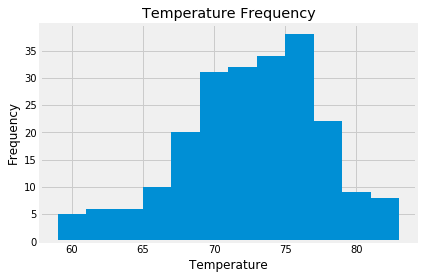

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temp, bins=12) # how does the hist choose to count freq for different timps
plt.title("Temperature Frequency")
plt.grid(True)
plt.figsize = (18,8)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

![precipitation](Images/station-histogram.png)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_stats = calc_temps('2016-8-23', '2017-8-23')
print(calc_temps('2016-8-23', '2017-8-23'))

[(58.0, 74.14387974230493, 87.0)]


API in app.py
